In [1]:
import numpy as np
import os
import util as u
from MRI_layers_MK1 import *
import matplotlib.pyplot as plt
import pickle

In [2]:
#base path to folder with scan data 
base = "/Users/nathanielnethercott/Desktop/School/2021/Pickled_Sample/"
fpaths = [os.path.join(base,p) for p in os.listdir(base)]

In [3]:
#test here represents data for first subject
test = pickle.load(open(fpaths[0], 'rb'))

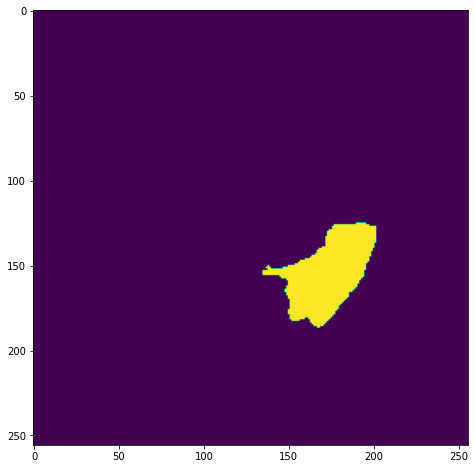

In [4]:
#split subject data into raw images and masks 
t1 = test[1]
t2 = test[2]

plt.figure(figsize=(8,8))
plt.imshow(t2[:,:,56])

In [5]:
#ignore this for the example

#my versions of some functions 
def _find_layers(mask_data):
    l = []
    for i in range(mask_data.shape[-1]):
        if np.mean(mask_data[:,:,i])>0.0:
            l.append(i)
    return l

def _area(mask):
    area = 0
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i,j]!=0:
                area+=1
    return area 

def _com(mask, target = 1.0):
    """
    ayo, not worth the effort rn to fill in a contour and average points
    --- lets just average y and x of contour boundaries
    
    ideally should work with contours too
    """
    indeces = []
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i,j]==target:
                indeces.append((i,j))
                
    _x = lambda pair: pair[0]
    _y = lambda pair: pair[1]
    
    #for some reason sorting didn't work and i'm mad about that 
    xvals = [_x(p) for p in indeces]
    yvals = [_y(p) for p in indeces]
    
    return (int(np.mean(xvals)), int(np.mean(yvals)))

#_find_layers(t2)

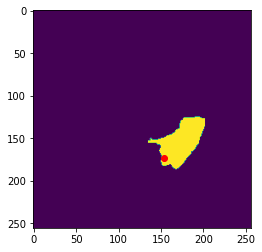

In [6]:
#normalize 
m = t2[:,:,56]/255

#find com and plot 
c = _com(m)
plt.imshow(m)
plt.plot(c[0], c[1], 'o', color = 'red')

#okay its not mad accurate but its close non?
#okay we have a ~semblance~ of where it shold be 

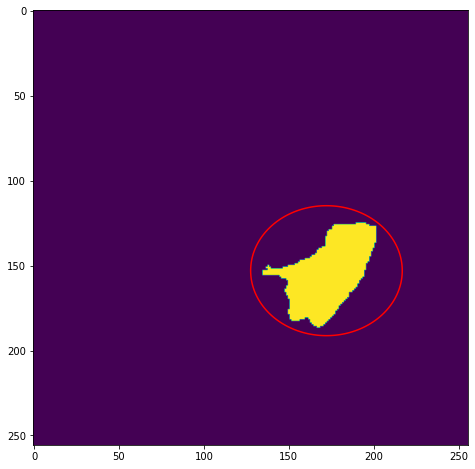

In [7]:
#try to get the segmentation functional going 
p = u.parabloid(m.shape, xrad = 0.35, yrad = 0.3, left=0.35, top = 0.2)

plt.figure(figsize=(8,8))
plt.contour(p, [0], colors=['red'])
plt.imshow(m)

In [65]:
def iteration(surface, image, dt=0.0001, alpha = 1, beta=1):
    d = lambda x,y: (x**2 + y**2)**0.5

    #absolutely do not forget to add this grid spacing in the function argument 
    sy, sx = np.gradient(surface, np.linspace(-1,1, surface.shape[0]), np.linspace(-1,1, surface.shape[1]))

    #write logic for the time evolution of the curves 
    #surface curvature 
    K = u.mean_curvature(surface)

    #now the evolution function:
    F1 = K
    F2 = (image-1.0)**2 - (image - np.zeros(image.shape))**2

    surface = surface - (beta*F2+alpha*F1)*d(sx,sy)*dt

    return surface

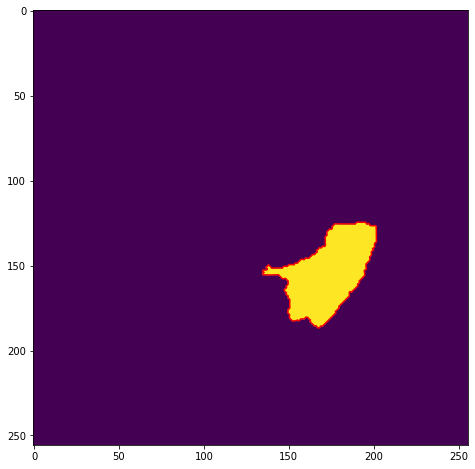

In [67]:
g = p

for i in range(1200):
    g = iteration(g, m, dt = 0.001, beta=0.11, alpha=0.001)

plt.figure(figsize=(8,8))
plt.contour(g, [0], colors=['red'])
plt.imshow(m)

In [ ]:
"""
Notes: 
WE ABSOLUTELY NEED THAT SPACING DEFINED IN GRADIENT COMPUTATION, JUST TRUST MAN 
"""